<a href="https://colab.research.google.com/github/Richardjmorton/KL7002_students/blob/main/Lab_2_Probability_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Module imports
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy import stats

# Workshop 2 - Probability and Statistics

In this workshop you will learning how to make use of tools in Python that will aid you in tackling problems involving probability and statistics (it turns out this is nearly all the time in data analysis).

One module in Python that can be used for statistical calculations is SciPy, which has a stats package. We note that the *SciPy stats* package has a large number of [statistical distributions](https://docs.scipy.org/doc/scipy/reference/stats.html) available.

The functionality in SciPy is useful for a wide range of problems, but you may have to turn to other packages when your task becomes more involved or specialised.

<br>

## Working with probability distributions


In order to analyse data efficiently and understand the uncertainties associated with the data, we will have to work with probability distributions. There are many probability distributions that [exist](https://en.wikipedia.org/wiki/Probability_distribution#Common_probability_distributions_and_their_applications), although you will not find all of them useful in physics.



### Calculating a pdf

In this example we will work with a Gaussian (or Normal) distribution. The Gaussian distribution is for continuous data.

The probability density function (pdf) of the Gaussian is given by

\begin{equation}
P(x;\,\mu,\,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left( \frac{(x-\mu)^2}{2\sigma^2}\right),
\tag{1.8}
\end{equation}

which describes the probability of observing $x$ given the parent distribution has a location value $\mu$ and spread $\sigma$, which correspond to the mean and standard deviation respectively. The Gaussian if often called the Normal distribution and denoted $\mathcal{N}(\mu,\sigma)$.


The Gaussian distribution (and associated statistical functions) is given in *SciPy* by the following

```python
from scipy import stats

stats.norm
```

This code is not complete and you need to specify what you want to do with the distribution. For example you might want to calculate the probability at a value of $x$

```python
x = 0
stats.norm.pdf(x, loc=1, scale=2)
```

where *loc* is the location parameter (in this case the mean) and *scale* is the scale parameter, which is the standard deviation.

The following plot shows some examples of Gaussian distributions calculated using the pdf function.



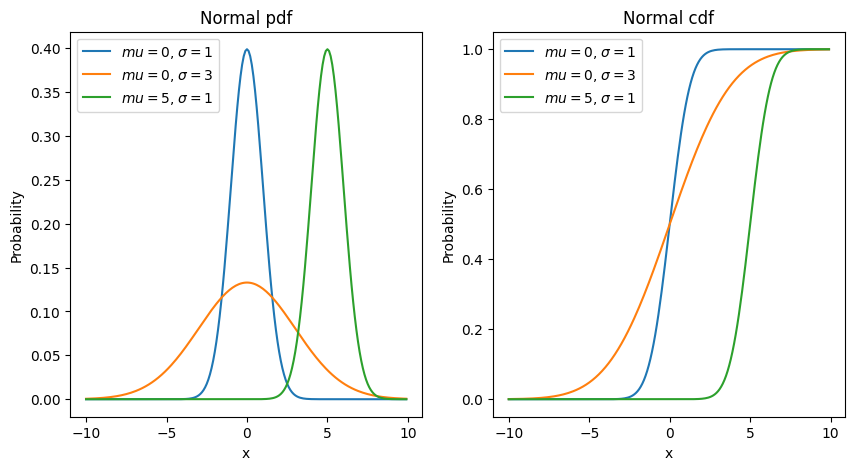

In [2]:
# Plot for Gaussian pdf & cdf

# Going to plot the results for 3 different Gaussians
# Specify list of means and stds to iterate over
mu = [0, 0, 5]
sigma = [1, 3, 1]

# set up figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# specify random variable values for plot
x_rv = np.arange(-10, 10, 0.1)

for loc, scale in zip(mu,sigma):
    # here create a callable that calculates properties of the normal distribution
    # with fixed mean and std.
    norm = stats.norm(loc=loc, scale=scale)

    # Use pdf function from callable
    ax[0].plot(x_rv, norm.pdf(x_rv), label = '$mu=${0}, $\sigma=${1}'.format(loc, scale))

    # Use cdf function from callable
    ax[1].plot(x_rv, norm.cdf(x_rv), label = '$mu=${0}, $\sigma=${1}'.format(loc, scale))


ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability')
ax[0].set_title("Normal pdf")
ax[1].set_xlabel('x')
ax[1].set_ylabel('Probability')
ax[1].set_title("Normal cdf")

_ = ax[0].legend()
_ = ax[1].legend()


### Calculating a pmf

Consider a number of independent trials of an experiment (independent means the outcome of one trial does not influence another). Each of these trials will give a set of outcomes. Some of these outcomes will gives us a desired event, called a “success”. The remainder of the outcomes will result in the event not happening, or “not-success”. A simple example is getting a head in a coin toss.

The probability of any particular number of “successes” can be found from the Binomial distribution formula.

If the number of independent trials is $n$, and the probability of a 'success' in any trial is $p$ (where $p$ does not change value between trials), then the probability that there are $r$ successes in $n$ trials is:

\begin{equation}\label{eq:binom}
P(X=r; n, p) = {^nC}_r\,p^r(1-p)^{(n-r)}
\tag{1.9}
\end{equation}

where the probability of a ‘not success’ in any trial is $1-p$. This equation describes the Binomial distribution, and is sometimes denoted $B(n, p)$.

Given that the number of successes is always an integer, the Binomial distribution describes discrete data. In this case, Eq. \ref{eq:binom} is called a probability mass function (pmf). This is as opposed to the pdf for continuous distributions.


For discrete distributions, one need to call the *pmf* to calculate the probability, i.e.
```python
x = 2
n = 3
p = 1/6
stats.binom.pmf(x, n, p)
```


The following figure shows the probability mass for the dice example discussed in the lecture notes.

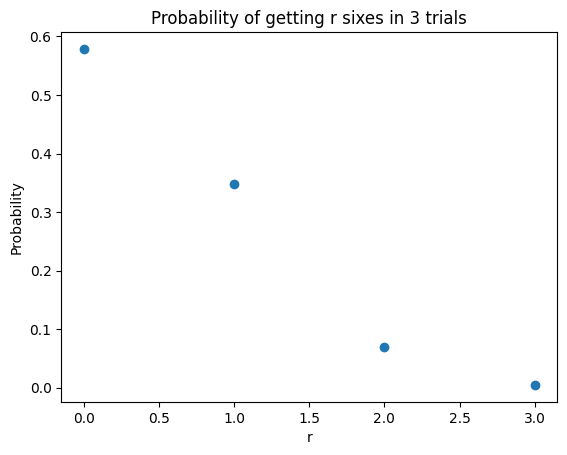

In [3]:
#Code for dice probability
from scipy import stats

# values of random variable
x_rv = np.arange(0,4,1)
# specify number of trials
n = 3
# specify probability of success
p = 1/6

_ = plt.plot( stats.binom.pmf(x_rv, n, p) ,'o' )
_ = plt.title( 'Probability of getting r sixes in 3 trials' )
_ = plt.xlabel('r')
_ = plt.ylabel('Probability')



Note that we have used individual points to plot the probability distribution rather than a line. This is because the binomial distribution is for discrete data, and values of, say 1.5 successes, are meaningless.

The following figure shows the distribution of probability for the cases when $n=20$ and $p=0.3$ and $p=0.7$. You can play with the sliders to see how the shape of the distribution changes for different values of $n$ and $p$.

interactive(children=(IntSlider(value=20, description='n', max=50, min=2), FloatSlider(value=0.35, description…

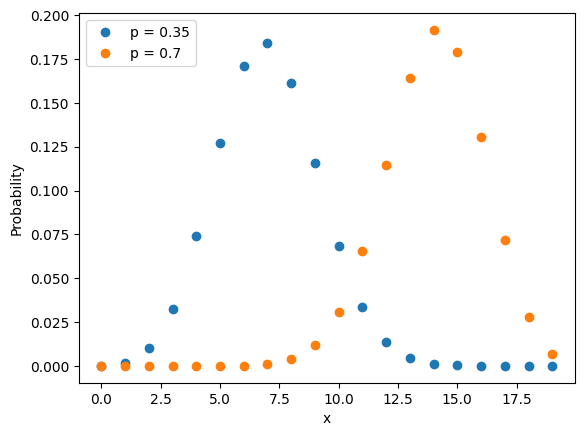

In [4]:
# Example with binomial distribution - run cell to make figure appear (ctrl+enter)

#n = 20
#p1 = 0.3
#p2 = 0.7

@interact(n=widgets.IntSlider(min=2, max=50, step=1, value=20),
          p1=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.35),
          p2=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.7))
def plot_binom(n, p1, p2):

    x_rv = np.arange(0, n, 1)
    plt.plot( stats.binom.pmf(x_rv, n, p1) ,'o' , label='p = {}'.format(str(p1)) )
    plt.plot( stats.binom.pmf(x_rv, n, p2) ,'o' , label='p = {}'.format(str(p2)))
    _ = plt.xlabel('x')
    _ = plt.ylabel('Probability')
    _ = plt.legend()



### Drawing random variables

The SciPy module enables you to perform other calculations with the probability distributions.

For example, you can draw random variables from a certain probability distribution, or calculate the moments.

random variables [2.843571   3.4328905  2.49395725 1.44029727 4.48591264]


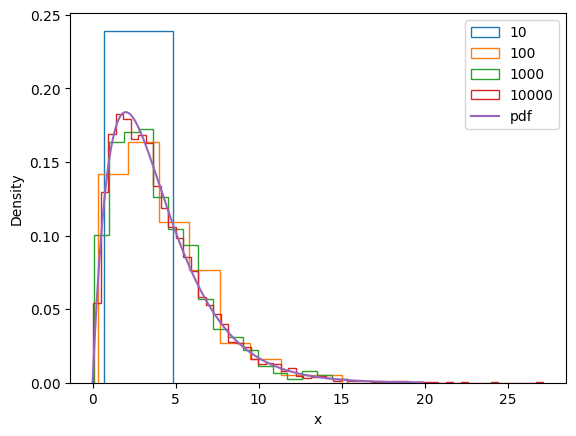

In [5]:
#Code for calculations Poisson distribution

# degrees of freedom
df = 2
# mean
mu = 4

dist = stats.chi2(mu)

print('random variables', dist.rvs(5)) #Draw 5 random variables


kwargs = {'bins':'scott', 'density': True, 'histtype':"step"}
_ = plt.hist(dist.rvs(10), **kwargs, label='10')
_ = plt.hist(dist.rvs(100), **kwargs, label='100')
_ = plt.hist(dist.rvs(1000), **kwargs, label='1000')
_ = plt.hist(dist.rvs(10000), **kwargs, label='10000')

# plot chi^2 pdf
x_rv = np.arange(0, 20, 0.1)
_ = plt.plot(x_rv, dist.pdf(x_rv), label='pdf')

_ = plt.ylabel('Density')
_ = plt.xlabel('x')
_ = plt.legend()

#### A histogram aside

A histogram is a common way to examine the empirical distribution of data. It is an approximate representation of the data's distribution. It involves counting the number of occurences of a random variable that fall within a 'bin'.

The bins can be any size (and not necessarily the same). Wide bins will have low noise (arising from random sampling) but are biased. Narrow bins have greater precision but will suffer from high variance (susceptible to changes if the sample changes).

There are some rules of thumb that can be used to choose an appropriate bin size. One of these is Scott's rule (which I use above), which says the bin size should be:
$$
h = \frac{3.49\hat{\sigma}}{^3\sqrt{n}}
$$
where $\hat{\sigma}$ is the sample standard deviation. Scott's rule is optimal if the samples are drawn from a normal distribution based on minimising the mean integrated square error (MISE):
$$
E\left[ \int (f_n(x)-f(x))^2dx \right]
$$
where $f$ is the unknown density (normal in the Scott case) and $f_n$ is the estimate based on the sample.

However, Scott's rule gives reasonable performance for eyeballing distributions even if they are not normal.

If you require the best estimate possible for the empirical distribution, you would use cross-validation (which we will meet later on) to minimise the MISE by selecting the best bin width.

### Moments of distributions

Should you want to find out various higher moments of the distribution you are using, then this is fairly straightforward:

In [6]:

mn, var, skew = dist.stats(moments='mvs')

print('Moments: mean = {0}, Variance = {1}, Skewness = {2}'.format(mn, var, skew))

Moments: mean = 4.0, Variance = 8.0, Skewness = 1.4142135623730951


## Describing real data

Often we are interested in describing the distribution of our data/experiment in a highly compact way. We use the phrase statistic to describe a way to summarize, reduce or describe the sample. As can be seen in the previous figure, the statistic is the sample mean, which is an estimate of a population parameter, the population mean.

Some standard statistics that can be calculated are the mean and median, but can be many other quantities, e.g. the maximum value, the minimum value, etc.  

The mean of the sample distribution is given by

$$
\bar{X}=\frac{1}{N}\sum x_i
\tag{1.12}
$$

with the mean of the parent distribution given as $\mu = \lim_{N\to\infty} \bar{X}$.

In Python, you can calculate the mean in a number of ways:

In [7]:
# create some pretend data
N = 20 # number of values in data set
x = stats.norm(loc=20, scale=2).rvs(N)

print( x.mean() )
print( np.mean(x) )

19.786868738274844
19.786868738274844


The median is the value in which half of the observations lie below that value and half lie above it. In this sense, the median describes the value where the probability of observing values above or below is 50%.

In [8]:
np.median(x)

19.59992480712456

The variance, $\sigma^2$, defines the dispersion of some observations. The dispersion is usually calculated with respect to the mean of the distribution, measuring the deviation ($x_i-\mu$). The variance is defined as the average sum of squared deviations:

$$
\sigma^2 = \frac{1}{N}\sum (x_i-\mu)^2
\tag{1.13}
$$

The standard deviation is the square root of the variance, $\sigma$.

The variance for the sample is normally, written as $s^2$, where
$$
s^2=\frac{1}{N-1}\sum (x_i-\bar{x})^2,
\tag{1.14}
$$
where the factor $1/(N-1)$ accounts for the fact we have had to use the sample mean $\bar{x}$. The sample standard deviation is then $s$.

As with the mean, there are multiple variations on finding the variance and standard deviation in Python. One thing to note is that the functions will likely calculate the population estimate. In order to calcaulte the sample values, you need to modify the degrees of freedom (*dof*), where the *dof* is the number of independent pieces of information used to estimate a statistic. So, for the variance, we have $N$ independent observations, but require an estimate for the mean - hence, our degrees of freedom are $N-1$. In Python, this information is given by a keyword
```python
np.var(x, ddof=1)
```
where we supply the value to subtract from $N$.

In [9]:
print('Population Variance {0:2.2f} {1:2.2f}'.format( x.var(), np.var(x) ) )
print('Population Standard deviation {0:2.2f} {1:2.2f}'.format(x.std(), np.std(x) ))
print('Sample Variance {0:2.2f} {1:2.2f}'.format( x.var(ddof=1), np.var(x, ddof=1) ) )
print('Sample Standard deviation {0:2.2f} {1:2.2f}'.format(x.std(ddof=1), np.std(x, ddof=1) ))

Population Variance 3.41 3.41
Population Standard deviation 1.85 1.85
Sample Variance 3.59 3.59
Sample Standard deviation 1.89 1.89


## Monte Carlo simulation

It may be the case that you want to examine how well a certain methodology will work before you apply it to real data. Or you've applied a methodology and you want an idea of the uncertainty on the statistic you've calculated.

One way to do this is with Monte Carlo simulations. The Monte Carlo part refers to the probabilistic nature. The idea behind these simulations is that you determine a model for how the real data generation process behaves (or more realistically you try to approximate the process). You can then draw random variables that emulate your measurements and you then apply your method to the simulated data.

Let's start with a simple example. First we'll assume we are trying to measure the flux of light from a star at a certain wavelength, and the flux is constant. The detector we are using counts the number of photons that hit it in a fixed time period (exposure time). Lets assume we make 10 individual measurements. What should we expect to see?

Firstly, photon counting follows Poisson statistics. This is because the incident flux of photons is not deterministic, but random. Hence, we need to draw random values from a Poisson distribution. The uncertainty in the number of photons is often called 'shot-noise'.

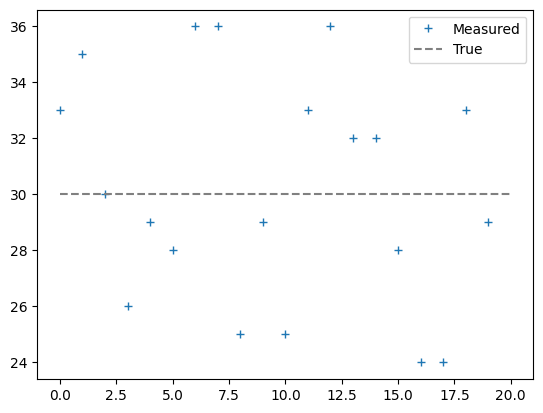

In [10]:
# MC simulation for photon counting

true_flux = 30
N_meas = 20

photon_dist = stats.poisson(mu=true_flux)
measured_counts = photon_dist.rvs(N_meas)

plt.plot(measured_counts, '+', label='Measured')
plt.hlines(true_flux, 0, N_meas, linestyles='--', color='gray', label='True')

plt.legend()

We can see that the measurements are 'noisy'.

What happens if we made 10 more measurements?

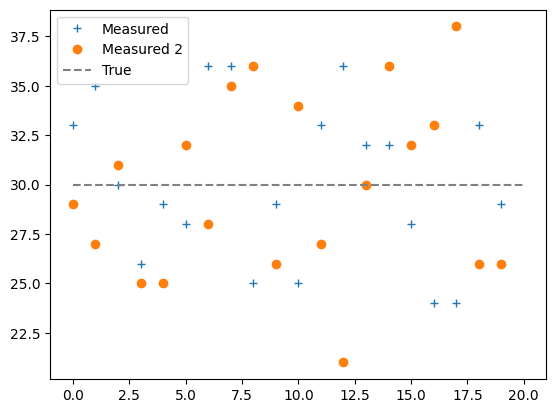

In [11]:
measured_counts2 = photon_dist.rvs(N_meas)

plt.plot(measured_counts, '+', label='Measured')
plt.plot(measured_counts2, 'o', label='Measured 2')
plt.hlines(true_flux, 0, N_meas,linestyles='--', color='gray', label='True')

plt.legend()

How do the means of each set of 10 measurements compare?

In [12]:
print(measured_counts.mean())
print(measured_counts2.mean())

30.15
29.85


Neither gives the exact answer.

What about the uncertainty on the mean value? From the properties of the Poisson distribution, the standard deviation should be $\sqrt{\mu}$, hence we can estimate this as $\sqrt{\bar{X}}$. The standard error on the mean is $\sigma/\sqrt{N}$.

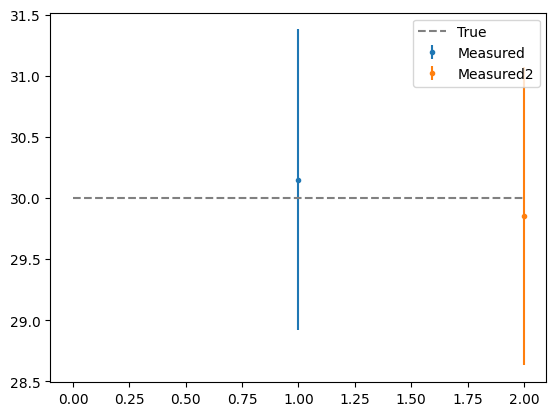

In [13]:
counts_stats = [measured_counts.mean(), np.sqrt(measured_counts.mean()/N_meas)]
counts_stats2 = [measured_counts2.mean(), np.sqrt(measured_counts2.mean()/N_meas)]

plt.errorbar(x=1, y=counts_stats[0], yerr=counts_stats[1],fmt='.', label='Measured')
plt.errorbar(x=2, y=counts_stats2[0], yerr=counts_stats2[1],fmt='.', label='Measured2')
plt.hlines(true_flux, 0, 2,linestyles='--', color='gray', label='True')

plt.legend()


# Example - simulating a detector

Let us undertake a detailed example of how one might simulate noise on a detector. The detector we are using will not be perfect. We will build the problem gradually.


First let us create an image to work with. We will just use a simple image which we assume is taken by a detector of 620 pixels square and is detecting a source with a mean incident flux of 300 photons.


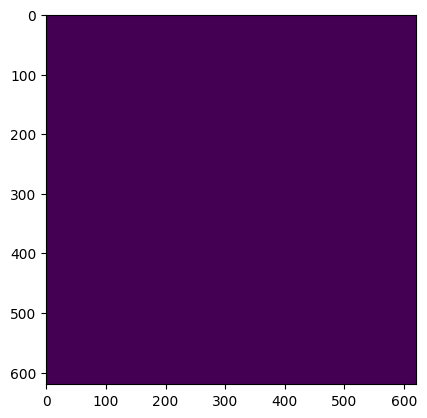

In [14]:
N_photons = 300
N_pixels = 620

test_image = np.ones((N_pixels, N_pixels))*N_photons

plt.imshow(test_image)

We can now add the shot noise due to the randomness of the photon flux.

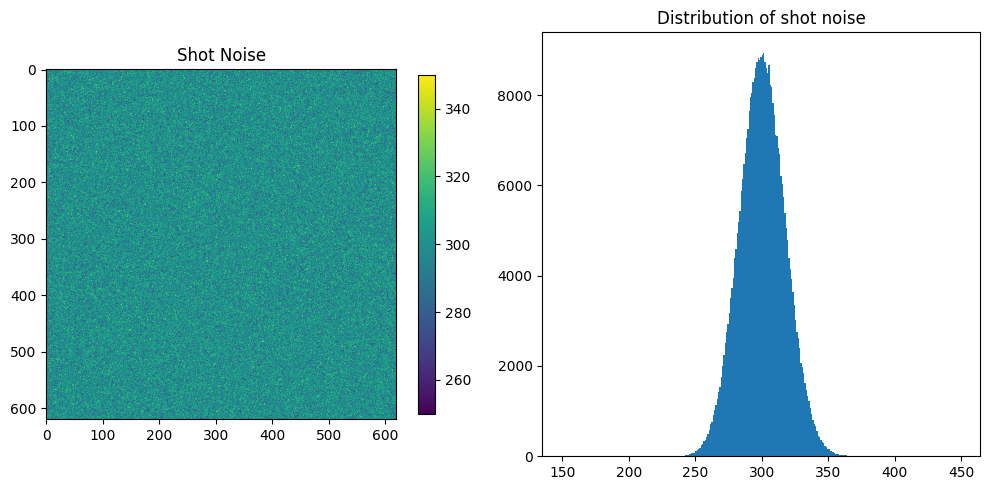

In [15]:
shot_noise = stats.poisson(mu = N_photons).rvs((N_pixels, N_pixels))

fig, ax = plt.subplots(1,2, figsize=(10,5))
pl = ax[0].imshow(shot_noise, vmin=250, vmax=350)
ax[0].set_title('Shot Noise')
_ = plt.colorbar(pl, ax=ax[0], shrink=0.8)

_ = ax[1].hist(shot_noise.ravel(), bins=np.arange(150,450))
ax[1].set_title('Distribution of shot noise')

plt.tight_layout()

The detector has various properties that means it can introduce additional noise to the counting of photons.

Typically detectors work not by counting photons directly, but by counting electrons that are released when a photon hits the material the detector is constructed of. These are known as photoelectrons.

The number of electrons $\mu_e$ generated by $\mu_p$ photons hitting the sensor upon the  quantum efficiency of the detector
$$
\eta = \frac{\mu_e}{\mu_p},
$$
which is usually a function of the wavelength. This is a designed property of the sensor.

Randomly, due to thermal effects, the material releases electrons not due to a photon hit. Hence the detectors still show a signal if no photons are hitting it. This is called a dark current. There is mean value for the dark current across the sensor, but there will be variability pixel to pixel.

Another source of noise is read noise, which is created by the electronics when the camera turns the charge (i.e., the electrons) into a voltage.

Often, these values can be calculated from tests on the camera. For our imaginary camera will assume the following values:

|Spec | Value|
| --- | ---|
|Quantum efficiency | 0.7|
| Dark noise | 12 e- |
| Read Noise | 20 e- |
| Sensitivity/Gain | 7 ADU |
| Analog to digital converter | 12 bit|

The values for dark and read noise are the standard deviation. Assuming the dark current and readout are independent, hence we can just add the standard deviations in quadrature.  We will model these with a normal distribution and add the new random variable to our previous measured counts to emulate the combined effect. Note that the dark noise is time-dependent (i.e., increases with exposure time) and is best modelled as a Poisson process.

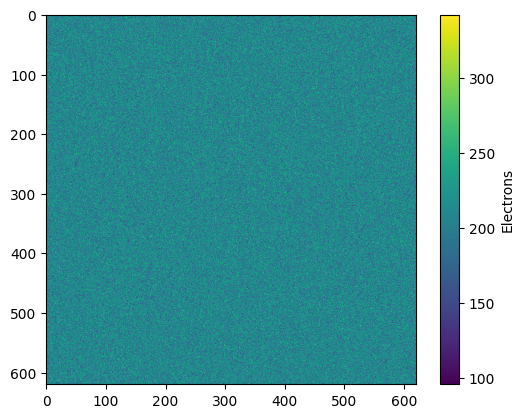

In [16]:
quantum_eff = 0.7
# Round to have a discrete number of electrons
electrons = np.round(quantum_eff * shot_noise)

read = 20
dark = 12
read_dark_sd =np.sqrt(read**2+dark**2)
read_dark = stats.norm(scale = read_dark_sd).rvs(electrons.shape)

electrons_out = np.round(read_dark + electrons)

plt.imshow(electrons_out)
plt.colorbar(label='Electrons')

The sensitivity (or gain) of the camera $K$ (𝐴𝐷𝑈/𝑒−) is the amplification of the voltage from the photoelectrons. Again, this a set property of the camera.

Now we need to convert the value of each pixel from electrons to ADU, or analog-to-digital units. ADU's are the units of grey scale that are output by monochrome cameras (which are used in astronomy).

The number of electrons (after the addition of read noise) are multiplied by the sensitivity. The ADU count is discrete and the maximum value of ADU's is $2k-1$ where $k$ is the camera's bit-depth.

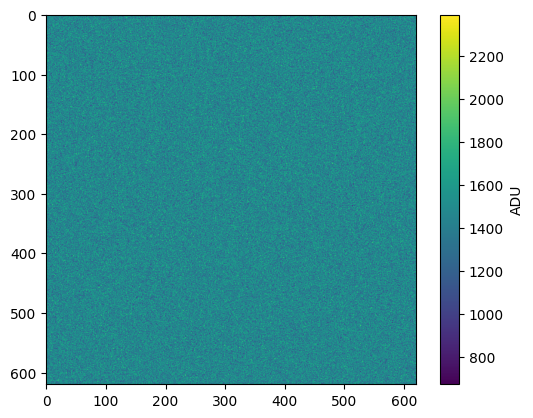

In [17]:
sensitivity = 7 # ADU/e-
k    = 12
max_adu     = int(2**k - 1)
adu         = (electrons_out * sensitivity).astype(int)
adu[adu > max_adu] = max_adu

img = plt.imshow(adu)

cb = plt.colorbar(img)
cb.set_label('ADU')


Let's write what we have done as an equations. The mean output, $\mu_x$, for a pixel is given by
$$
\mu_x=K\mu_d+K\eta\mu_p
$$
and the variance of the output $\sigma^2_x$ is
$$
\sigma^2_x=K^2\sigma^2_d+K(\mu_x-K\mu_d).
$$

Here, $\mu$ and $\sigma^2$ aer the mean and variance of the photons hitting the camera($p$), the dark noise ($d$) and the output signal in ADU ($x$).

## Comparing distributions

The final topic in this section examines the comparison of probability distributions. We can make this clearer by looking at an example.

We are going to use the [Kolmogorov-Smirnov (KS) test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) and [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test), which can examine whether two distributions can be considered equal.

Let us suppose we have some data we believe to drawn from a normal distribution. The data is plotted in a histogram below.

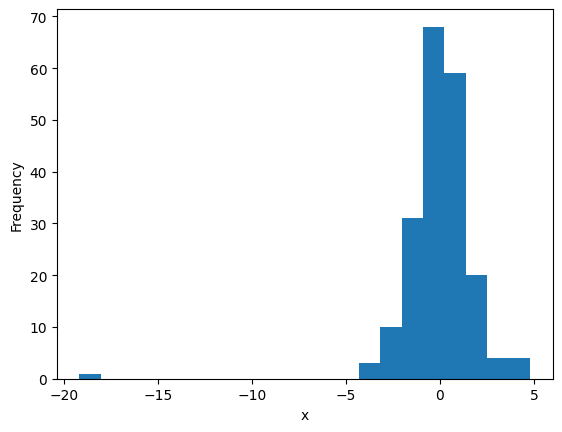

In [18]:
# Create data with `unknown` distribution
# Actually a Student-t distribution

rng = np.random.default_rng(123)

sample = rng.standard_t(df=3, size=200)

plt.hist(sample, bins='scott')
_ = plt.xlabel('x')
_ = plt.ylabel('Frequency')



It looks reasonably normally distributed. Maybe there is one or 2 odd values. Let us use the one-sided KS test to examine whether there is evidence to suggest it is not normally distributed.

The KS test can either be one-sided or two-sided. A one-sided test is where our data is compared to a known reference distribution, e.g. the normal distribution. The two-sided test is when we want to compare to measured sets of data to each other, with no indication on what the actual distribution might be.

In order to do this, the KS test will essentially compare the [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) for our data the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) for the reference distribution (in this case the normal cumulative distribution function).

The figure below shows the empirical distribution function and the normal cumulative distribution function.

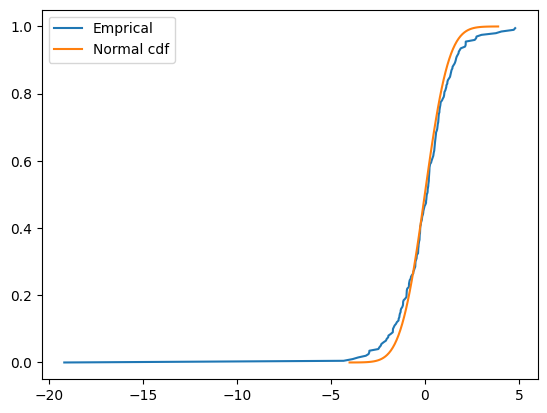

In [19]:
# Comparison of edf to cdf

x = np.arange(-4,4,0.1)
norm_cdf = stats.norm(0,1).cdf(x)

plt.plot(np.sort(sample), np.linspace(0, 1, len(sample), endpoint=False),
         label = 'Emprical')
plt.plot(x, norm_cdf, label ='Normal cdf' )
_ = plt.legend()


We know need to provide a quantitative assessment of the difference between the two distributions. The method compares the two distributions at each value of $x$ and calculates the difference between the two distribution functions. The KS test uses the largest distance between the distribution functions and compares this to critical values at a certain significance level. A typical choice of significance level is 5%.

The KS test assumes a null hypothesis that the two distributions are the same. We then look for evidence that goes against the hypothesis. The significance level chosen sets a boundary value.

Let's assume that we set a 5% significance level. If the observed difference is larger than the critical value at the 5% level, we can say there is evidence that the two distributions are different. What the test actually tells us is that, if the two distributions are the same, we are likely to see this size of difference 5% of the time.

To implement this test in Python, we can use SciPy stats package:

In [20]:
(d,p) = stats.kstest(sample, 'norm')

print('Maximum difference {0:2.4f}; p-value {1:2.4f}'.format(d,p))

Maximum difference 0.0618; p-value 0.4132


We can see here that the p-value returned in greater than 5%. Hence we accept our null hypothesis. If the p-value was less than 0.05 we would reject the null.


It turns out that the KS test is more sensitive to differences near the center of the distributions, and less sensitive to the tails. So in this case, it might not be the best test to use. Let's try the Anderson-Darling test.

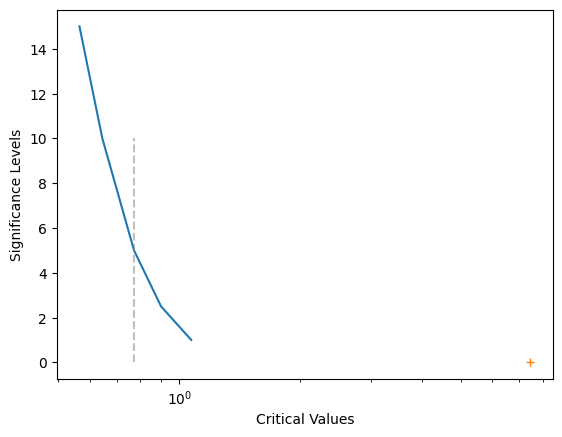

In [21]:
d, crit_vals, signif_levels = stats.anderson(sample, 'norm')

plt.plot(crit_vals, signif_levels)
plt.xlabel('Critical Values')
plt.ylabel("Significance Levels")
plt.xscale('log')

plt.vlines(crit_vals[2], 0, 10, linestyles='--', color='grey', alpha=0.5)
plt.plot(d, 0, '+')

It can be seen that the test statistical is much larger than the critical value at 5%. Hence, there is evidence to reject the null hypothesis.

## Exercises

The following are basic exercises to get used to working the SciPy stats package.

1. Draw 10,000 random variables from the normal distribution. What is the mean? What is the standard deviation? What percentage of values lie between -1.96 and 1.96?


2. Using *matplotlib*, plot a histogram of the random variables drawn in the previous question. Before doing this, have a look at the documentation for the *hist* and examine the *bins* argument. You can enter strings. Find out what these strings mean and choose one to use.


3. Overplot the probability distribution function for the normal curve on the histogram created for the previous question. Make sure you have a legend that describes what the histogram shows.


4. Draw 10 random values from the normal distribution, calculate the mean. Do this a 10,000 times and plot a histogram of the mean values. What is the mean of the mean values? What is the standard deviation? Can you explain the value of the standard deviation?


5. Plot the Chi-squared probability distribution with 3 degrees of freedom. And calculate the mean of the distribution.


6. We are now going to explore an aspect of statistics called the ['Central Limit Theorem'](https://en.wikipedia.org/wiki/Central_limit_theorem). The theorem states that, given a large enough sample size, the sampling distribution for the mean of a variable will be approximately normally distributed, irrespective of the distribution that generates the variable. Let's see how this works with the Chi-squared distribution. Using the Chi-squared distribution, you should draw random values to create a sample. For each sample calculate the mean. Repeat this a large number of times to get many values of the sample mean. Create a plot that shows the distribution of sample means when the sample contains either 2, 10, 50 or 200 samples.


The following exercises are based on astronomical data, putting into practice the statistics we've learnt.

7. Suppose we know from a previous sample of 100 galaxy clusters that 10 contain a dominant central galaxy. We plan to check another 30 different galaxy clusters for a dominant central galaxy. What is the probability that we might find another 10? (*Adapted from Wall & Jenkins*)


8. A  star has a monochromatic flux, $F_\lambda=1e8$ Jy at $\lambda=8542$ Å measured with a 1 m$^2$ detector at Earth, the signal is integrated over 10 seconds. Generate a typical series of data that would be recorded if the detector made 50 measurements (assuming the star is not varying).


9. In the following exercise we are going to look at records of daily sunspot counts. In order to complete the exercise, we will be using *Pandas* and learning a couple of tricks.

i) Import the file *'SN_d_hem_v2.0.csv'* using Pandas.

ii) Plot the daily sunspot number in the North and South hemispheres for all times.

iii) Do the same plot, but show a 30 day rolling mean (this can be achieved with a simple Pandas command).

iv) Plot the probability distribution and cumulative distribution of sunspot numbers in each hemisphere. How do they compare?

## References

Bevington & Robinson, *Data Reduction and error analysis for the physical sciences*, McGraw Hill

Wall & Jenkins, *Practical Statistics for Astronomers*, Cambridge University Press

